In [8]:
pip install yfinance

  Using cached yfinance-0.1.69-py2.py3-none-any.whl (26 kB)
  Using cached multitasking-0.0.10.tar.gz (8.2 kB)
  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=94a295ff8d25d70e2942d11a75dd58c5f11916de4acf31abcef107b821c859d5
  Stored in directory: /Users/maxime/Library/Caches/pip/wheels/f2/b5/2c/59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking
Note: you may need to restart the kernel to use updated packages.


In [9]:
import yfinance as yf

In [18]:
import warnings

# Setup
warnings.filterwarnings("ignore")

In [60]:
# Import pandas
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import aic
from statsmodels.tools.eval_measures import bic


# Download the datafile from yfinance
data = yf.download("BTC-USD", period="max")[['Close']]
data.index = pd.to_datetime(data.index)
data.head().round(2)

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2014-09-17,457.33
2014-09-18,424.44
2014-09-19,394.80
2014-09-20,408.90
2014-09-21,398.82


In [73]:
data.shape

(2682, 1)

Do we have stationnary data ?

In [14]:
result = adfuller(data)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

# p-value > 0.05 the data is non stationnary

ADF Test Statistic: -1.10
5% Critical Value: -2.86
p-value: 0.71


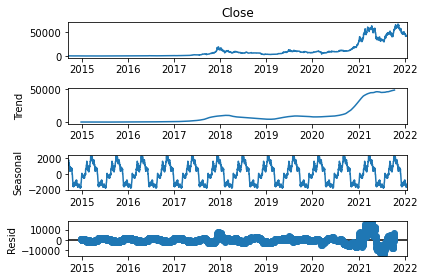

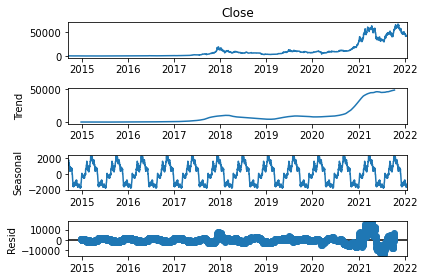

In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(data['Close'].dropna(), freq=200)
decompose.plot()

What about autocorrelation?

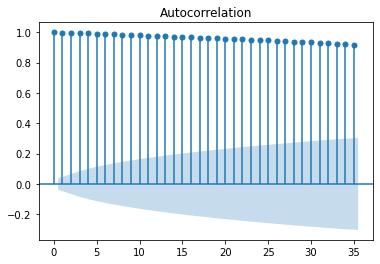

In [15]:
# Calculate the ACF (via statsmodel)
plot_acf(data)
# Show the data as a plot (via matplotlib)
plt.show()

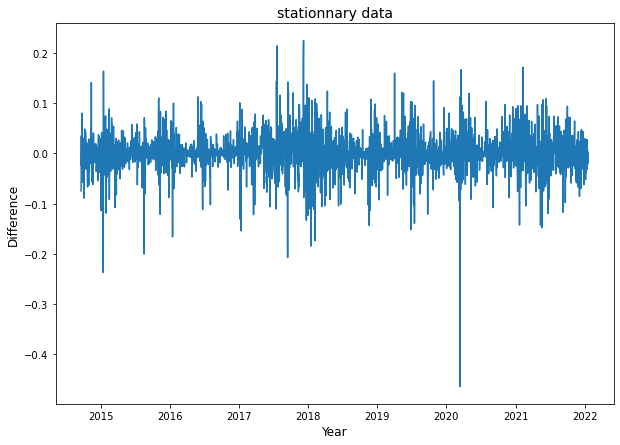

In [75]:
# transform to stationnary data

data['Difference'] = np.log(data['Close']).diff().dropna() # diff for difference

# Plot the Change
plt.figure(figsize=(10, 7))
plt.plot(data['Difference'])
plt.title('stationnary data', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

Implement AR and MA models.

In [ ]:
partial autocorrelation

In [95]:
result = adfuller(data['Difference'].dropna())
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

# p-value < 0.05 the data is stationnary

ADF Test Statistic: -15.54
5% Critical Value: -2.86
p-value: 0.00


In [76]:
# Split data
test = data['Difference'][-885:]
train = data['Difference'][:-885]

In [77]:
# AR model
model = ARMA(train.dropna(), order=(1,0)) #
ar1 = model.fit()

# summary of fit model
print(ar1.summary())
forecast_ar1 = ar1.predict(start=test.index[0], end=test.index[-1])

#df['forecast']=results.predict(start=90, end=103, dynamic=True)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.82038D+00    |proj g|=  2.77044D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      5      1     0     0   0.000D+00  -1.820D+00
  F =  -1.8203771030065135     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                              ARMA Model Results                              
Dep. Variable:             Difference   No. Observations:                 1796
Model:                     ARMA(1, 0

 This problem is unconstrained.


In [78]:
# AR2 model
model = ARMA(train.dropna(), order=(2,0)) #
ar2 = model.fit()

# summary of fit model
print(ar2.summary())
forecast_ar2 = ar2.predict(start=test.index[0], end=test.index[-1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.82049D+00    |proj g|=  5.47330D-02

At iterate    5    f= -1.82049D+00    |proj g|=  2.09955D-02

At iterate   10    f= -1.82049D+00    |proj g|=  2.78444D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     16      1     0     0   7.105D-07  -1.820D+00
  F =  -1.8204926660136125     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                      

 This problem is unconstrained.


In [79]:
# MA1 model
model = ARMA(train.dropna(), order=(0,1)) #
ma1 = model.fit()

# summary of fit model
print(ma1.summary())
forecast_ma1 = ma1.predict(start=test.index[0], end=test.index[-1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.82038D+00    |proj g|=  3.44169D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      7      1     0     0   3.042D-06  -1.820D+00
  F =  -1.8203771030329394     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:             Difference   No. Observations:                 1796
Model:                     ARMA(0, 1

 This problem is unconstrained.


Please use AIC, BIC and error-based metrics for the estimations

In [80]:
# MA2 model
model = ARMA(train.dropna(), order=(0,2)) #
ma2 = model.fit()

# summary of fit model
print(ma2.summary())
forecast_ma2 = ma2.predict(start=test.index[0], end=test.index[-1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.82050D+00    |proj g|=  2.28484D-05

At iterate    5    f= -1.82050D+00    |proj g|=  1.86517D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     12      1     0     0   2.376D-06  -1.821D+00
  F =  -1.8205011419053287     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:             Difference   No. Observati

 This problem is unconstrained.


In [81]:
# ARMA model
model = ARMA(train.dropna(), order=(1,2)) #
arma = model.fit()

# summary of fit model
print(arma.summary())
forecast_arma = arma.predict(start=test.index[0], end=test.index[-1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.82037D+00    |proj g|=  5.23146D-02

At iterate    5    f= -1.82038D+00    |proj g|=  2.19910D-02

At iterate   10    f= -1.82038D+00    |proj g|=  2.24132D-04

At iterate   15    f= -1.82038D+00    |proj g|=  1.91658D-03

At iterate   20    f= -1.82038D+00    |proj g|=  7.58171D-04

At iterate   25    f= -1.82038D+00    |proj g|=  5.59713D-02

At iterate   30    f= -1.82040D+00    |proj g|=  3.38760D-01

At iterate   35    f= -1.82071D+00    |proj g|=  2.03333D-01

At iterate   40    f= -1.82099D+00    |proj g|=  9.23928D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


In [83]:
# ARMA model
model = ARMA(train.dropna(), order=(1,1)) #
arma11 = model.fit()

# summary of fit model
print(arma11.summary())
forecast_arma11 = arma11.predict(start=test.index[0], end=test.index[-1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.82037D+00    |proj g|=  5.20890D-02

At iterate    5    f= -1.82038D+00    |proj g|=  1.51611D-02

At iterate   10    f= -1.82038D+00    |proj g|=  5.81757D-06

At iterate   15    f= -1.82038D+00    |proj g|=  3.62599D-05

At iterate   20    f= -1.82038D+00    |proj g|=  1.64828D-03

At iterate   25    f= -1.82038D+00    |proj g|=  1.71634D-03

At iterate   30    f= -1.82038D+00    |proj g|=  2.93321D-05

At iterate   35    f= -1.82038D+00    |proj g|=  1.16573D-05

At iterate   40    f= -1.82038D+00    |proj g|=  2.70228D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


What are the models with the best performance?

Create the function that allows to implement ARMA model, evaluate the result and choose one model with the best performance.

In [124]:
models={'ARMA01':ma1,'ARMA02':ma2,'ARMA10':ar1,'ARMA20':ar2,'ARMA21':arma,'ARMA11':arma11}

def check_arma_model(dicts_models):
    models_AIC={}
    models_BIC={}
    for model in models.keys():
    #    forecast = model.predict(start=test.index[0], end=test.index[-1]) 
        aic = models[model].aic
        bic = models[model].bic
        models_AIC[model]=aic
        models_BIC[model]=bic
    print(min(models_AIC.values()))
    print(min(models_BIC.values()))
    print(models_AIC)
    print(models_BIC)


check_arma_model(models)
# the best model is ar1 : ARMA(1,0)

-6532.794554094318
-6516.314602347732
{'ARMA01': -6532.794554094318, 'ARMA02': -6531.240101723941, 'ARMA10': -6532.794553999396, 'ARMA20': -6531.209656320896, 'ARMA21': -6531.007425433816, 'ARMA11': -6530.799243422147}
{'ARMA01': -6516.314602347732, 'ARMA02': -6509.266832728492, 'ARMA10': -6516.31460225281, 'ARMA20': -6509.236387325447, 'ARMA21': -6503.540839189505, 'ARMA11': -6508.825974426698}


Make the forecast for the 5 periods

In [137]:
forecast_ar1 = ar1.predict(start=test.index[0], end='2022-01-24 00:00:00')

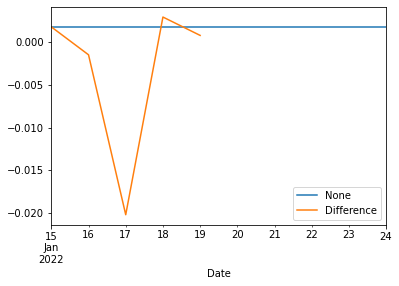

In [138]:
last_week = test.iloc[-5:]
forecast_now = forecast_ar1.iloc[-10:]

forecast_now.plot()
last_week.plot()
plt.legend()
plt.show()

Make the conclusion

The price of bitcoin seems just under the prediction and should be stable in the 5 comming days.

Make business conclusion answering the question, if I should buy Bitcoins

As the prediction is very close to reality, we should wait that the price drops significantly under the prediction